In [10]:
from google.colab import files

# Open a dialog box to upload files
uploaded = files.upload()

Saving employee_data.xlsx to employee_data.xlsx
Saving employee_engagement_survey_data.csv to employee_engagement_survey_data.csv
Saving recruitment_data.csv to recruitment_data.csv
Saving training_and_development_data.csv to training_and_development_data.csv


In [11]:
import pandas as pd

# Dictionary to hold the dataframes
dataframes = {}

# Load each file into a pandas DataFrame
for filename in uploaded.keys():
    if filename.endswith('.xlsx'):
        dataframes[filename] = pd.read_excel(filename)
    elif filename.endswith('.csv'):
        dataframes[filename] = pd.read_csv(filename)
    print(f'Loaded {filename}')

# Example of accessing a specific DataFrame
employee_data_df = dataframes['employee_data.xlsx']
employee_engagement_survey_df = dataframes['employee_engagement_survey_data.csv']
recruitment_data_df = dataframes['recruitment_data.csv']
training_and_development_data_df = dataframes['training_and_development_data.csv']

Loaded employee_data.xlsx
Loaded employee_engagement_survey_data.csv
Loaded recruitment_data.csv
Loaded training_and_development_data.csv


In [26]:
# Merge the datasets on 'Employee ID'
combined_df = pd.merge(employee_data_df, employee_engagement_survey_df, on='Employee ID', how='inner')

In [27]:
#Q1
# Create a pivot table to summarize the total number of employees in each department
pivot_total_employees = employee_data_df.pivot_table(index='DepartmentType', aggfunc='size')
print(pivot_total_employees)

DepartmentType
Admin Offices             80
Executive Office          24
IT/IS                    430
Production              2020
Sales                    331
Software Engineering     115
dtype: int64


In [28]:
#Q2
# Filter and display employees with "Performance Score" below 3
low_performance = employee_data_df[employee_data_df['Current Employee Rating'] < 3]
print(low_performance)

      Employee ID FirstName LastName  StartDate   ExitDate  \
3            3430   Michael  Riordan 2021-06-21        NaT   
7            3434  Sharlene    Terry 2020-11-06 2023-01-29   
15           3442    Kaylah     Moon 2019-07-09 2022-06-16   
19           3446    Hector   Dalton 2021-08-24        NaT   
23           3450    Reilly    Moyer 2020-09-01 2022-12-04   
...           ...       ...      ...        ...        ...   
2993         3420      Levi   Hayden 2020-10-10 2022-08-05   
2994         3421   Brenden    Leach 2022-05-09 2022-09-08   
2997         3424   Annabel  Wilkins 2020-12-09 2022-08-04   
2998         3425    Kendra    Braun 2019-05-28 2021-10-23   
2999         3426     Chace     Kerr 2022-04-27        NaT   

                        Title          Supervisor  \
3          Area Sales Manager      Rebekah Wright   
7          Area Sales Manager       Tracy Marquez   
15         Area Sales Manager        Ashley Scott   
19         Area Sales Manager       Sydney 

In [29]:
#Q3
# Calculate average "Satisfaction Score" for male and female employees
pivot_satisfaction_score = combined_df.pivot_table(index='GenderCode', values='Satisfaction Score', aggfunc='mean')
print(pivot_satisfaction_score)

            Satisfaction Score
GenderCode                    
Female                3.005945
Male                  3.042489


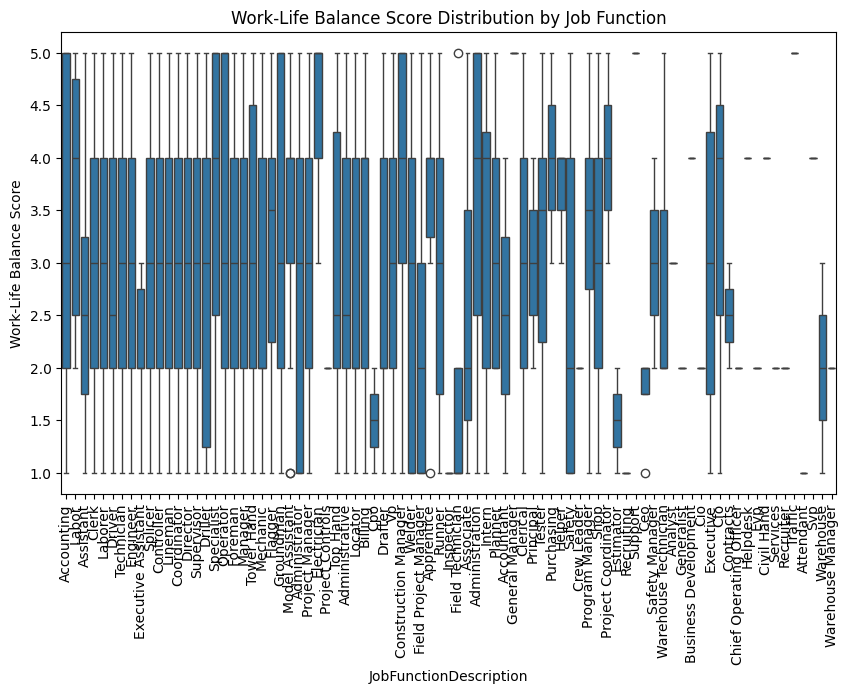

In [31]:
#Q4
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of "Work-Life Balance Score" for different job functions
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobFunctionDescription', y='Work-Life Balance Score', data=combined_df)
plt.xticks(rotation=90)
plt.title('Work-Life Balance Score Distribution by Job Function')
plt.show()

In [34]:
#Q5
# Filter to display only terminated employees
terminated_employees = combined_df[combined_df['EmployeeStatus'] == 'Voluntarily Terminated']

# Find the most common "Termination Type"
most_common_termination_type = terminated_employees['TerminationType'].mode()[0]
print(f'Most common Termination Type: {most_common_termination_type}')

Most common Termination Type: Involuntary


In [35]:
#Q6
# Calculate average "Engagement Score" for each department
pivot_engagement_score = combined_df.pivot_table(index='DepartmentType', values='Engagement Score', aggfunc='mean')
print(pivot_engagement_score)

                      Engagement Score
DepartmentType                        
Admin Offices                 2.925000
Executive Office              3.375000
IT/IS                         3.025581
Production                    2.906436
Sales                         2.990937
Software Engineering          2.973913


In [40]:
#Q7
# Find supervisor's email for a specific employee ID (example: employee_id = 12345)
employee_id = 3427
supervisor_email = combined_df.loc[combined_df['Employee ID'] == employee_id, 'ADEmail'].values[0]
print(f'Supervisor Email for Employee ID {employee_id}: {supervisor_email}')

Supervisor Email for Employee ID 3427: uriah.bridges@bilearner.com


In [41]:
#Q8
# Calculate average "Employee Rating" for each department
pivot_employee_rating = combined_df.pivot_table(index='DepartmentType', values='Current Employee Rating', aggfunc='mean')
highest_avg_rating_dept = pivot_employee_rating['Current Employee Rating'].idxmax()
print(f'Department with the highest average Employee Rating: {highest_avg_rating_dept}')

Department with the highest average Employee Rating: Admin Offices


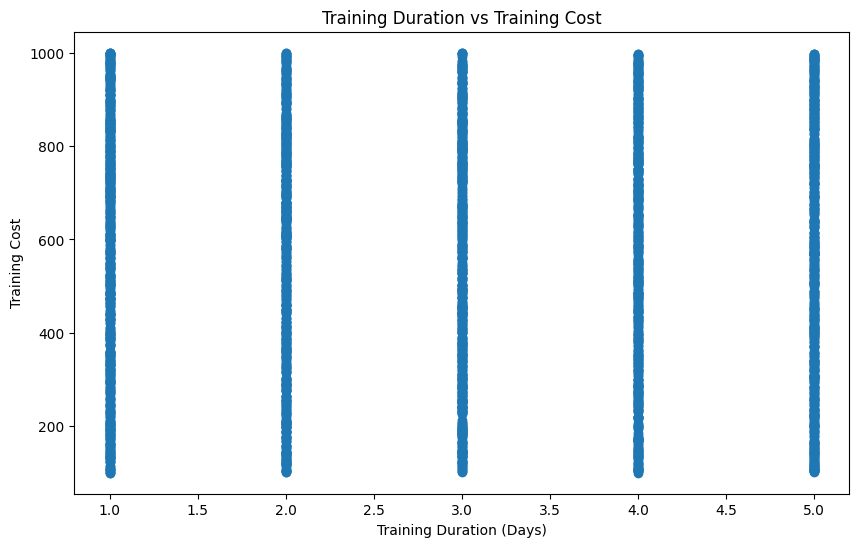

In [44]:
#Q9
# Scatter plot for "Training Duration (Days)" vs "Training Cost"
plt.figure(figsize=(10, 6))
plt.scatter(training_and_development_data_df['Training Duration(Days)'], training_and_development_data_df['Training Cost'])
plt.title('Training Duration vs Training Cost')
plt.xlabel('Training Duration (Days)')
plt.ylabel('Training Cost')
plt.show()

In [46]:
#Q10
# Pivot table for count of employees by "RaceDesc" and "GenderCode"
pivot_race_gender = combined_df.pivot_table(index='RaceDesc', columns='GenderCode', aggfunc='size', fill_value=0)
print(pivot_race_gender)

GenderCode  Female  Male
RaceDesc                
Asian          346   283
Black          346   272
Hispanic       325   247
Other          318   264
White          347   252


In [57]:
#Q11
# Example employee ID for which we want to find the training program name
employee_id = 1001

# Filter the training data for the specific employee ID
employee_training_data = training_and_development_data_df[training_and_development_data_df['Employee ID'] == employee_id]

# Extract the training program name
training_program_name = employee_training_data['Training Program Name'].values[0]

print(f'Training Program Name for Employee ID {employee_id}: {training_program_name}')

Training Program Name for Employee ID 1001: Customer Service


In [60]:
#Q12
# Multi-level pivot table for "Performance Score" by "BusinessUnit" and "JobFunctionDescription"
pivot_performance_score = combined_df.pivot_table(index=['BusinessUnit', 'JobFunctionDescription'], values='Current Employee Rating', aggfunc='mean')
print(pivot_performance_score)

                                     Current Employee Rating
BusinessUnit JobFunctionDescription                         
BPC          Administration                         3.000000
             Administrative                         3.285714
             Administrator                          3.444444
             Assistant                              3.000000
             Associate                              2.000000
...                                                      ...
WBL          Technician                             2.666667
             Top Hand                               3.500000
             Tower Hand                             3.000000
             Vp                                     3.666667
             Welder                                 3.000000

[445 rows x 1 columns]


In [64]:
#Q13
import plotly.express as px

# Example employee ID for dynamic selection
employee_id = 3427

# Filter data for the selected employee
employee_data = combined_df[combined_df['Employee ID'] == employee_id]

# Create a line plot
fig = px.line(employee_data, x='StartDate', y='Current Employee Rating', title=f'Performance Over Time for Employee ID {employee_id}')
fig.show()

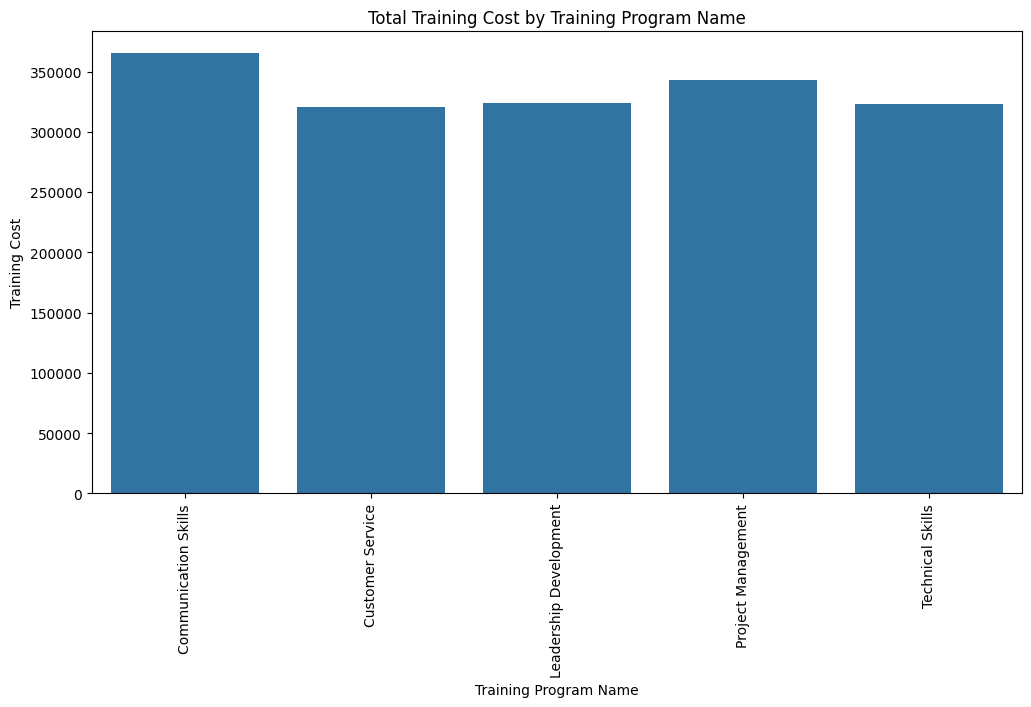

In [66]:
#Q14
# Total training cost for each "Training Program Name"
total_training_cost = training_and_development_data_df.groupby('Training Program Name')['Training Cost'].sum().reset_index()

# Bar chart for total training cost
plt.figure(figsize=(12, 6))
sns.barplot(x='Training Program Name', y='Training Cost', data=total_training_cost)
plt.xticks(rotation=90)
plt.title('Total Training Cost by Training Program Name')
plt.show()

In [68]:
#Q15
# Calculate the 10th and 90th percentiles of employee ratings
top_10_percentile = combined_df['Current Employee Rating'].quantile(0.9)
bottom_10_percentile = combined_df['Current Employee Rating'].quantile(0.1)

# Filter employees based on percentiles
top_10_percentile_employees = combined_df[combined_df['Current Employee Rating'] >= top_10_percentile]
bottom_10_percentile_employees = combined_df[combined_df['Current Employee Rating'] <= bottom_10_percentile]
bottom_10_percentile_employees

,Employee ID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Male,58782,Other,Single,Fully Meets,2,16-06-2023,5,5,4
7,3434,Sharlene,Terry,2020-11-06,2023-01-29,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,...,Female,97756,White,Divorced,Fully Meets,2,21-04-2023,1,4,2
15,3442,Kaylah,Moon,2019-07-09,2022-06-16,Area Sales Manager,Ashley Scott,kaylah.moon@bilearner.com,PYZ,Active,...,Male,2810,Black,Single,Exceeds,2,31-10-2022,2,5,3
19,3446,Hector,Dalton,2021-08-24,NaT,Area Sales Manager,Sydney French,hector.dalton@bilearner.com,BPC,Active,...,Female,16325,White,Divorced,Exceeds,2,21-05-2023,4,3,5
23,3450,Reilly,Moyer,2020-09-01,2022-12-04,Area Sales Manager,Stanley Harvey,reilly.moyer@bilearner.com,MSC,Active,...,Male,11765,Other,Single,Exceeds,2,18-01-2023,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,3420,Levi,Hayden,2020-10-10,2022-08-05,Production Technician I,Lynn Smith,levi.hayden@bilearner.com,NEL,Active,...,Female,18079,Other,Married,Fully Meets,2,8/3/2023,2,3,3
2994,3421,Brenden,Leach,2022-05-09,2022-09-08,Production Technician I,Donna Lawson,brenden.leach@bilearner.com,PL,Active,...,Female,57340,Other,Divorced,Fully Meets,1,15-02-2023,5,4,2
2997,3424,Annabel,Wilkins,2020-12-09,2022-08-04,Production Technician I,Mr. James Castillo,annabel.wilkins@bilearner.com,TNS,Voluntarily Terminated,...,Male,6608,White,Single,Fully Meets,2,14-03-2023,2,4,5
2998,3425,Kendra,Braun,2019-05-28,2021-10-23,Production Technician I,Michael Woods,kendra.braun@bilearner.com,WBL,Voluntarily Terminated,...,Female,3807,Hispanic,Divorced,Fully Meets,2,25-12-2022,5,2,3


In [70]:
#Q16
# Extract year from StartDate
combined_df['Year'] = pd.to_datetime(combined_df['StartDate']).dt.year

# Pivot table for average "Engagement Score" per year
pivot_engagement_score_year = combined_df.pivot_table(index='Year', values='Engagement Score', aggfunc='mean')
print(pivot_engagement_score_year)

      Engagement Score
Year                  
2018          2.898039
2019          3.065217
2020          2.939189
2021          2.888333
2022          2.943548
2023          2.832836


In [76]:
#Q19
# Total training cost for employees in a specific location
location = 'Lake Anthonyton'  # Example location
total_training_cost_location = training_and_development_data_df[training_and_development_data_df['Location'] == location]['Training Cost'].sum()
print(f'Total Training Cost for employees in {location}: {total_training_cost_location}')

Total Training Cost for employees in Lake Anthonyton: 729.41
